# Credict Card Data Seti

Veri seti Eylül 2013'de kredi kartı sahipleri tarafından yapılan işlemleri içerir. Bilgi gizliliği için veri setine PCA dönüşümü uygulanmıştır. Veri setinin label'ı 1 : dolandırıcılık işlemi, 0 : normal işlemdir.

In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_zip=zipfile.ZipFile("C:/Users/okand/Desktop/projeler2/Credit Card Fraud/creditcard.csv.zip")
data=pd.read_csv(df_zip.open("creditcard.csv"))
veri=data.copy()
veri.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("Veri setindeki dolandırıcılık işlemi oranı {}".format(round(len(veri[veri["Class"]==1])/len(veri),3)))

Veri setindeki dolandırıcılık işlemi oranı 0.002


Veri setinde dolandırıcılık işlemi oranı çok düşük. Train ve test datalarını ayrırken dikkatli olmak gerekiyor.

In [4]:
print("Dolandırıcılık işlemi: {}\nNormal işlem: {}".format(len(veri[veri["Class"]==1]),len(veri[veri["Class"]==0])))

Dolandırıcılık işlemi: 492
Normal işlem: 284315


## Keşifci Veri Analizi

In [5]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Dolandırıcılık tutarlarını zamana göre ilişkisini inceleyelim.

Time: Her işlem ile veri kümesindeki ilk işlem arasında geçen saniyeleri içerir.

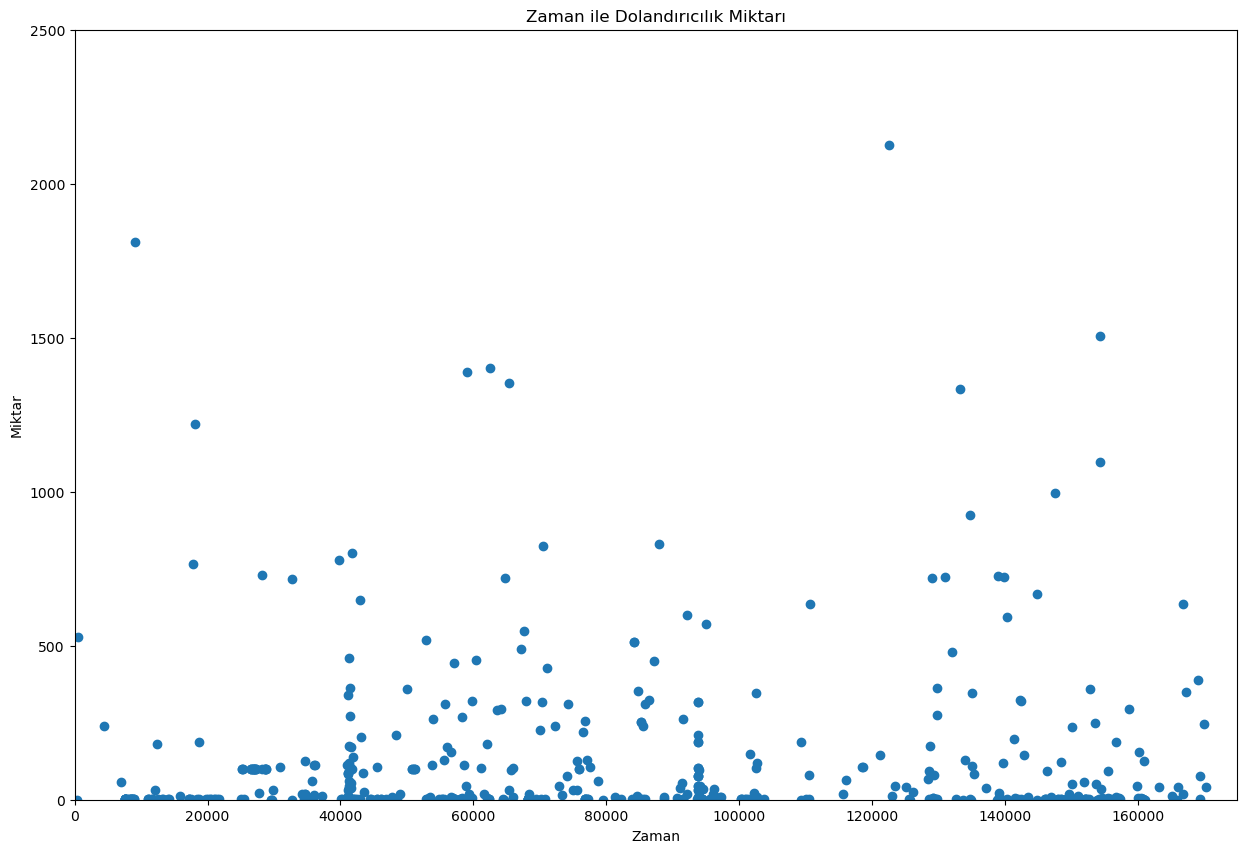

In [6]:
plt.figure(figsize=(15,10))
plt.scatter(veri[veri["Class"]==1]["Time"],veri[veri["Class"]==1]["Amount"])
plt.title("Zaman ile Dolandırıcılık Miktarı")
plt.xlabel("Zaman")
plt.ylabel("Miktar")
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

Zaman dolandırıcılık sıklığını etkilemiyor. Aralarında doğrusal bir ilişki söz konusu değil.

In [7]:
buyuk_miktar=veri[veri["Class"]==1][veri["Amount"]>1000].shape[0]
print("{} dolandırıcılık işleminden 1000'den daha büyük tutarlı olan sadece {} işlem vardır".
      format(len(veri[veri["Class"]==1]),buyuk_miktar))

492 dolandırıcılık işleminden 1000'den daha büyük tutarlı olan sadece 9 işlem vardır


C:\Users\okand\AppData\Local\Temp\ipykernel_6720\1813461368.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  buyuk_miktar=veri[veri["Class"]==1][veri["Amount"]>1000].shape[0]


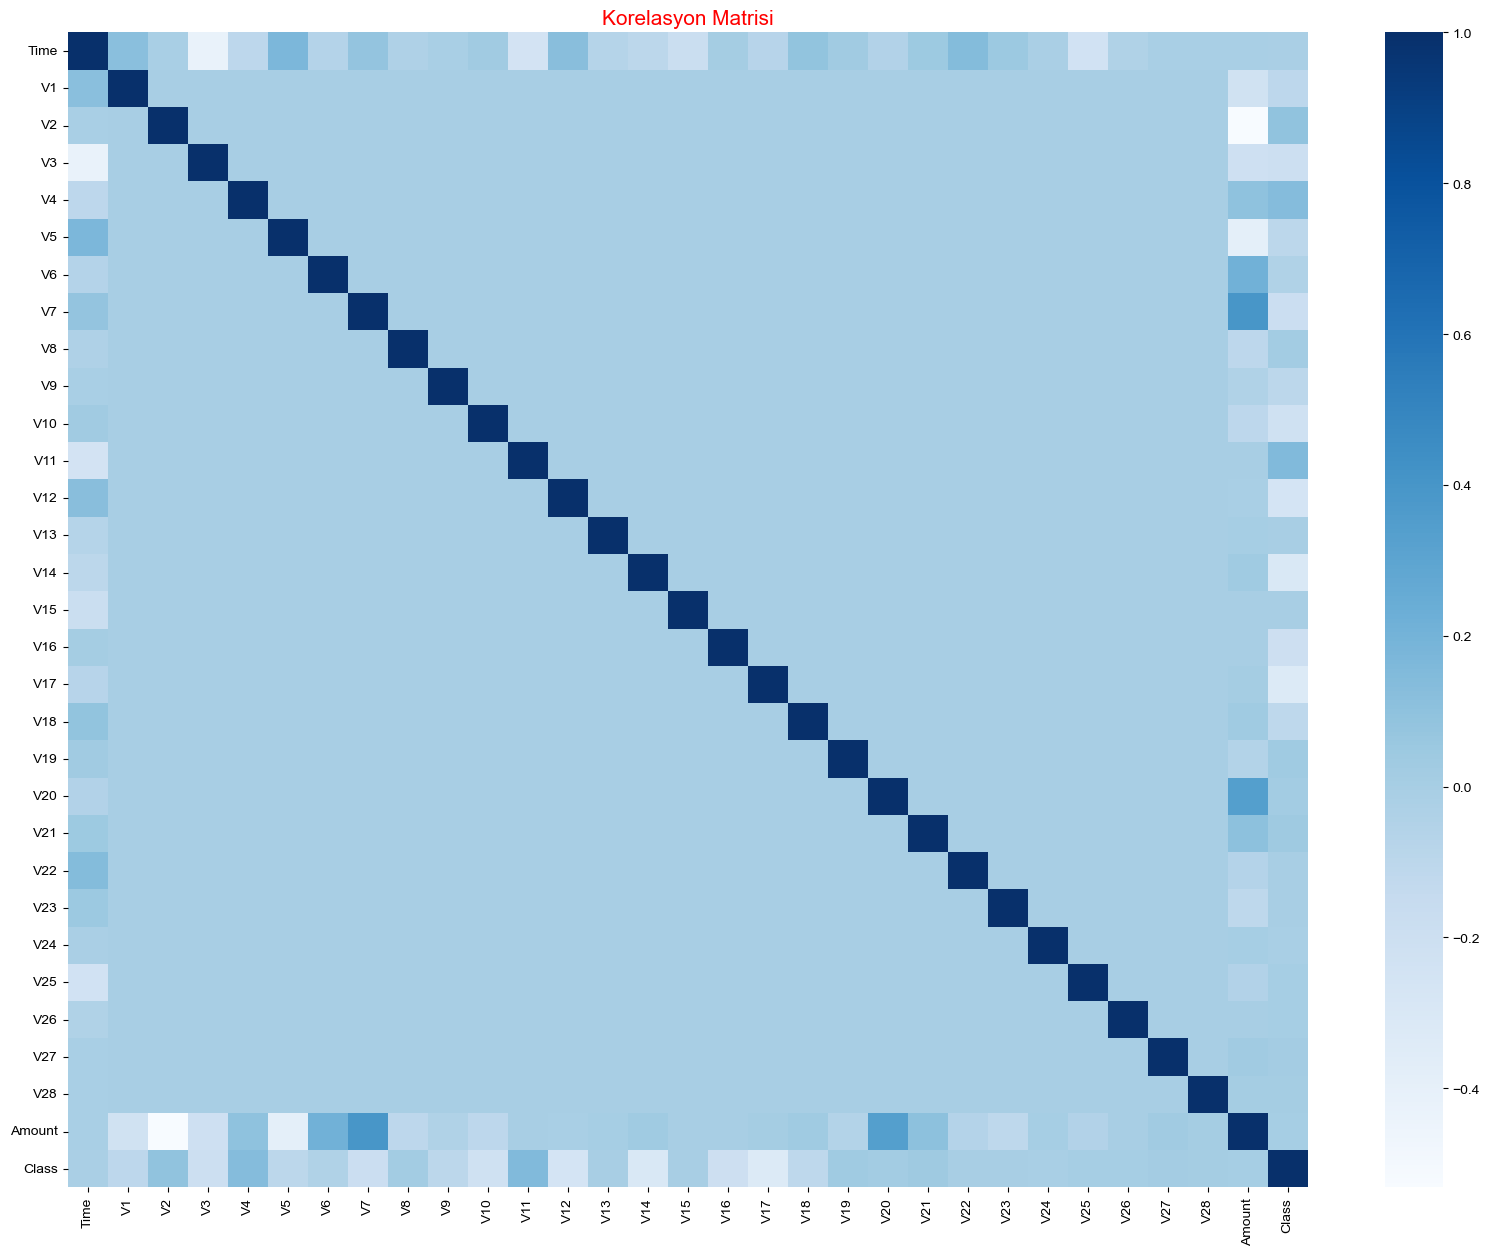

In [8]:
veri_corr=veri.corr()
plt.figure(figsize=(20,15))
plt.title("Korelasyon Matrisi", color="red", fontsize=15)
sns.heatmap(veri_corr,annot=False,cmap="Blues")
sns.set(font_scale=2,style='white')
plt.show()

PCA dönüşümü uygulandığı için özelliklerin çoğu bir biri ile ilişkili değildir.

In [9]:
veri_corr["Class"] # Bağımlı değişken ile özelliklerin ilişkileri

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [10]:
data_rank=pd.DataFrame(veri_corr["Class"])
data_rank=np.abs(data_rank).sort_values(by="Class",ascending=False)
data_rank

,Class
Class,1.000000
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961
V7,0.187257
V11,0.154876
V4,0.133447


In [11]:
veri.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
veri.shape

(284807, 31)

In [14]:
print(veri[veri["Class"]==1].shape[0])
print(veri[veri["Class"]==0].shape[0])

492
284315


# Sınıflandırma Modelleri

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,ConfusionMatrixDisplay

In [16]:
y=veri["Class"]
X=veri.drop(['Time', 'Class'],axis=1)

In [17]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [19]:
print(f"""
Train data setinde yer alan dolandırıcılık işlemi sayısı: {len(y_train[y_train==1])}\n
Train data setinde yer alan normal işlem sayısı: {len(y_train[y_train==0])}\n
Train data setinde dolandırıcılık işlemi oranı: {round(len(y_train[y_train==1])/len(y_train[y_train==0]),3)}\n
Test data setinde yer alan dolandırıcılık işlemi sayısı: {len(y_test[y_test==1])}\n
Test data setinde yer alan normal işlem sayısı: {len(y_test[y_test==0])}\n
Test data setinde dolandırıcılık işlemi oranı: {round(len(y_test[y_test==1])/len(y_test[y_test==0]),3)}\n
Orjinal data setinde dolandırıcılık olayı: {round(len(veri[veri["Class"]==1])/len(veri),3)}
""")


Train data setinde yer alan dolandırıcılık işlemi sayısı: 301

Train data setinde yer alan normal işlem sayısı: 170583

Train data setinde dolandırıcılık işlemi oranı: 0.002

Test data setinde yer alan dolandırıcılık işlemi sayısı: 191

Test data setinde yer alan normal işlem sayısı: 113732

Test data setinde dolandırıcılık işlemi oranı: 0.002

Orjinal data setinde dolandırıcılık olayı: 0.002



## Sınıflandırma modellerine dair başarı puanlarının alınması:

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [24:43<00:00, 51.14s/it]


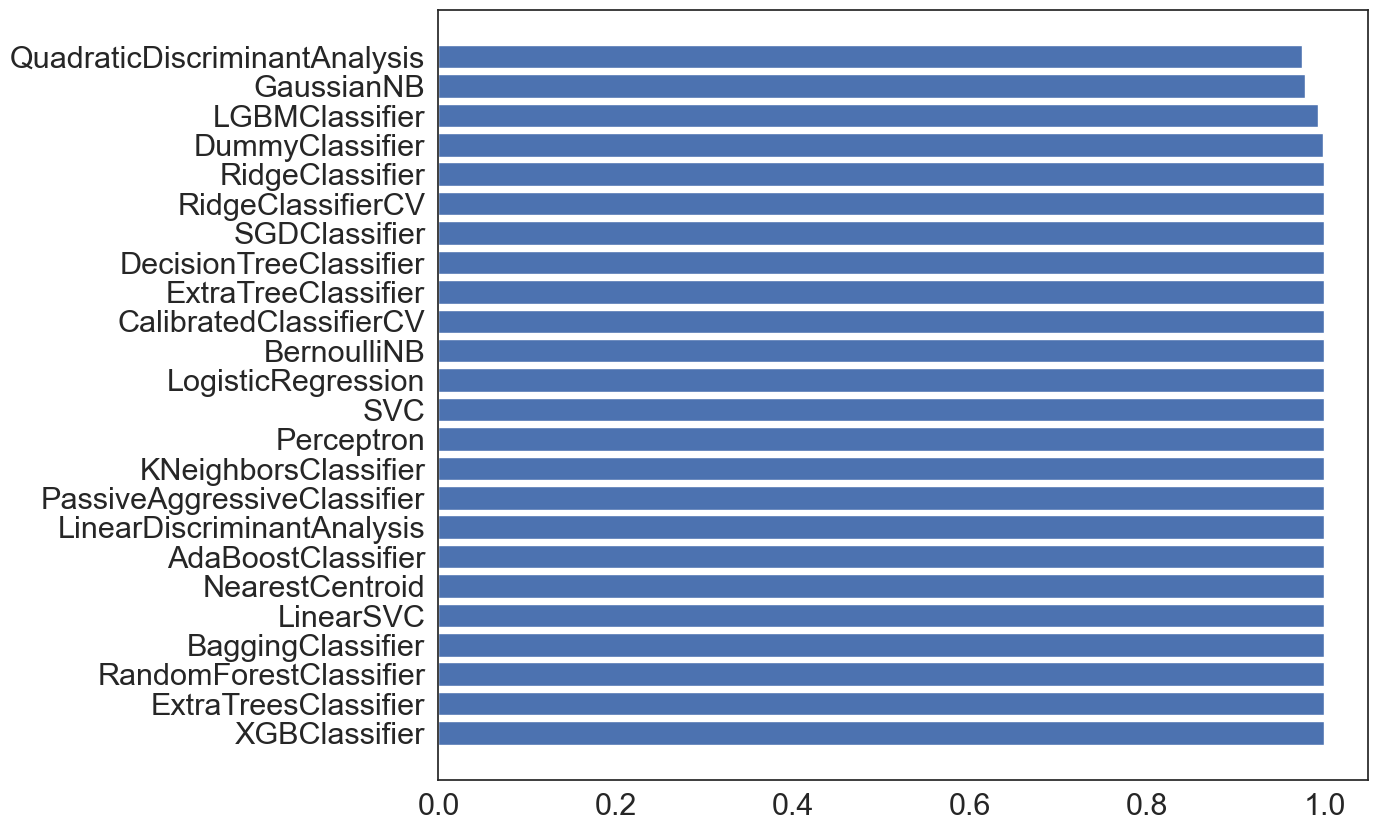

In [20]:
clf=LazyClassifier()
modeller,tahmin=clf.fit(X_train,X_test,y_train,y_test)
sıra=modeller.sort_values(by="Accuracy",ascending=False)

plt.figure(figsize=(12,10))
plt.barh(sıra.index,sıra["Accuracy"]) # ön eğleme için görüş verir...
plt.show()

In [23]:
def model_kur(model):
    model.fit(X_train,y_train)
    tahmin=model.predict(X_test)
    acs=accuracy_score(y_test,tahmin)
    cm=confusion_matrix(y_test,tahmin)
    cr=classification_report(y_test,tahmin)
    return [tahmin,acs,cm,cr]
    

In [21]:
modeller=[]
modeller.append(("LinearSVC",LinearSVC(random_state=0)))
modeller.append(("KNN",KNeighborsClassifier()))
modeller.append(("Bagging Classifier",BaggingClassifier(random_state=0)))
modeller.append(("Random Forest Classifier",RandomForestClassifier(random_state=0)))
modeller.append(("XGB Classifier",XGBClassifier()))

## Model Tuning:

In [22]:
tunings=[]
tunings.append(("LinearSVC",LinearSVC(random_state=0),{"C":[0.1,1,10,100],"penalty":["l1","l2"]}))
tunings.append(("KNN",KNeighborsClassifier(),{"n_neighbors":range(1,20)}))
tunings.append(("Bagging Classifier",BaggingClassifier(random_state=0),{"n_estimators":[10,100,1000,2000]}))
tunings.append(("Random Forest Classifie",RandomForestClassifier(random_state=0),{"n_estimators":[1000,2000],"max_depth":[4,10],"min_samples_split":[2,5]}))
tunings.append(("XGB Classifier",XGBClassifier(),{"learning_rate":[0.001,0.01],"n_estimators":[1000,2000],"max_depth":[4,10],"subsample":[0.6,0.8]}))

In [ ]:
def tuning(model,parametreler):
    grid=GridSearchCV(model,param_grid=parametreler,cv=3)
    grid.fit(X_train,y_train)
    return grid.best_params_

modelad2=[]
tun=[]

for i in tunings:
    modelad2.append(i[0])
    tun.append(tuning(i[1],i[2]))

print(tun)

LazyClassifier ile belirlediğimiz uygulanacak modellerin doğruluk skorlarını ve confuision matrisinden bizim için önemli olan FN kısmını alacağız. FN kısmının önemli olmasının nedeni, modelin gerçekte olan dolandırıcılık işlemini normal işlem olarak tahmin etmesi oranıdır. Bu oranın düşük olmasını isteriz.

In [25]:
ad=[]
basari=[]
fn=[]

for i in modeller:
    t=model_kur(i[1])[0]
    ad.append(i[0])
    basari.append(accuracy_score(y_test,t))
    fn.append(confusion_matrix(y_test,t)[1][0])

sonuc=pd.DataFrame({"Model Adı":ad,"Model Başarısı":basari,"Confusion Matrix (FN)":fn})
sonuc

,Model Adı,Model Başarısı,Confusion Matrix (FN)
0,LinearSVC,1.00,49
1,KNN,1.00,50
2,Bagging Classifier,1.00,44
3,Random Forest Classifier,1.00,41
4,XGB Classifier,1.00,33


En iyi modelin XGB Classifier oldugunu görmüş olduk. Sadece XGB Classifier için model tununing yapalım. Yukarıdaki kod tüm modelleri için hiper parametre optimizasyonu yapar.

In [32]:
def tuning(model,parametreler):
    grid=GridSearchCV(model,param_grid=parametreler,cv=3)
    grid.fit(X_train,y_train)
    return grid.best_params_

optimal_hiper_parametreler=tuning(tunings[4][1],tunings[4][2])
optimal_hiper_parametreler

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 2000, 'subsample': 0.8}

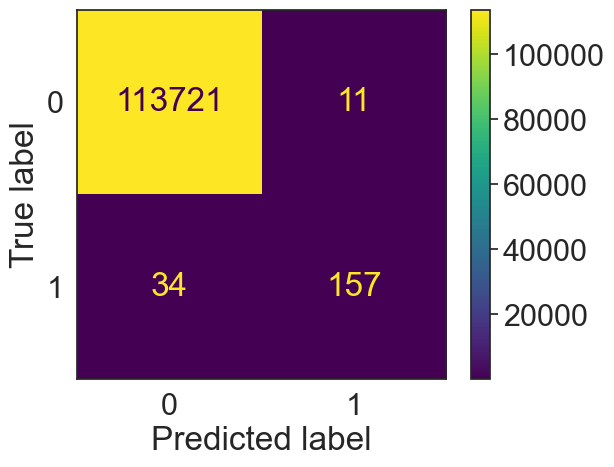

In [34]:
modelxgb=XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=2000,subsample=0.8)
modelxgb.fit(X_train,y_train)
tahmin=modelxgb.predict(X_test)

cm = confusion_matrix(y_test, tahmin)
cm_display = ConfusionMatrixDisplay(cm).plot()

Hiper parametre optimizasyonunda daha iyi aralıklar tanımlanarak, daha iyi sonuçlar alınabilir. Cpu yetersiz olduğundan bu çalışmada aralıkları kısıtlı tutmak durumunda kaldım.

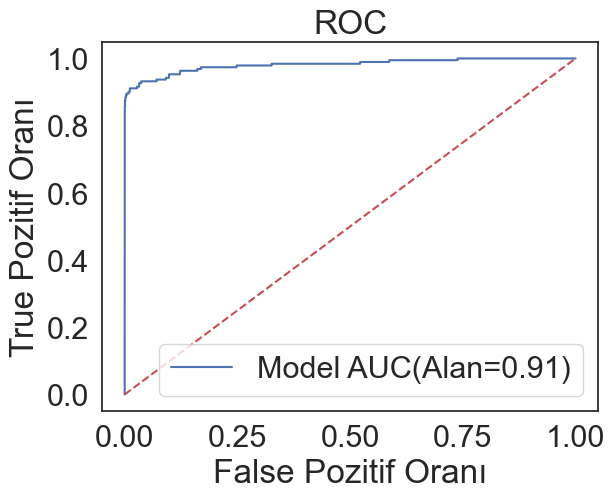

In [36]:
# roc eğrisi:
auc=roc_auc_score(y_test,tahmin)

fpr,tpr,thresold=roc_curve(y_test,modelxgb.predict_proba(X_test)[:,1]) #predict_proba: olasılık hesabı yapısı
plt.plot(fpr,tpr,label="Model AUC(Alan=%0.2f)" % auc)
plt.plot([0,1],[0,1],"r--")
plt.xlabel("False Pozitif Oranı")
plt.ylabel("True Pozitif Oranı")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()